In [1]:
import pca_processor as pca_p
from data_processor import load_config, Preprocessor
import matplotlib.pyplot as plt
%matplotlib inline
import os

In [2]:
# 1) Load configuration
cfg = load_config("config.json")

# 2) Transform .dat files and save in various formats
dp = Preprocessor(cfg)

## Data preprocessing
preprocesed data can be exported to .h5 file.

In [4]:
coordinate_dict = dp.preprocess(save_json=False)

In [6]:
ds = dp.gaussian_broadening_seq(coordinate_dict, sigma=4, save_h5=True)

In [9]:
# checking the fermi surface image
# p = ds.up.sel(composition=50).values - ds.dn.sel(composition=50)
# plt.imshow(p, cmap="seismic")

In [11]:
h5 = pca_p.load_h5data(os.path.join(cfg["BASE_PATH"], "data_sigma4.h5"))

## PCA analysis

In [12]:
data = pca_p.combine_updn_data(h5)

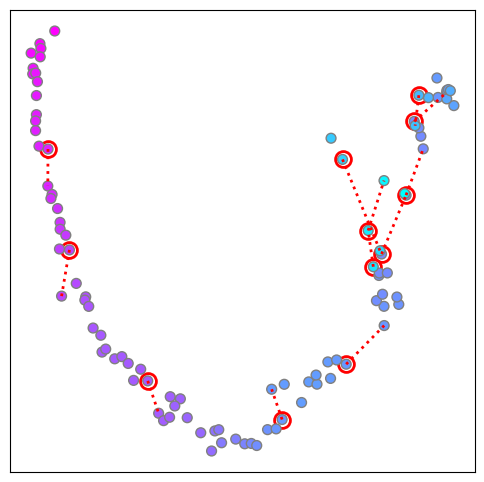

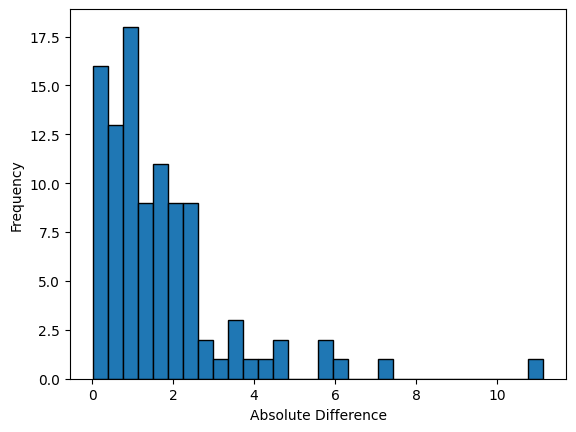

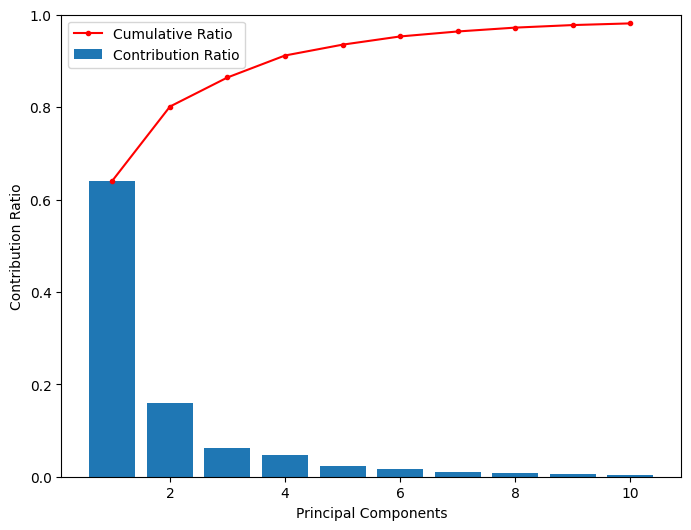

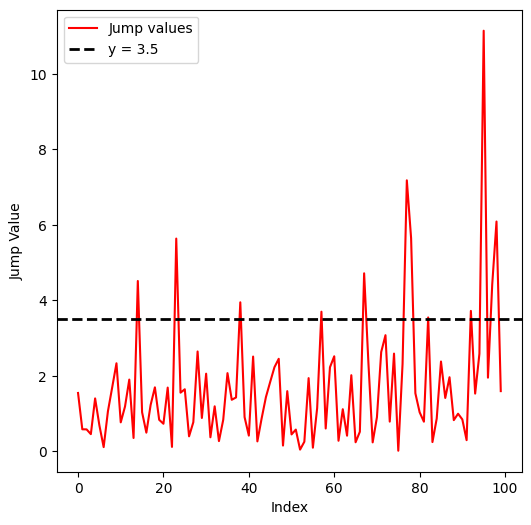

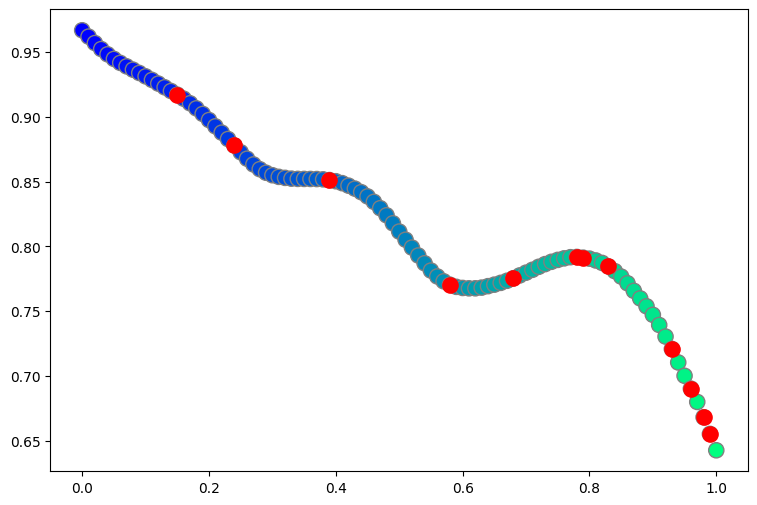

In [13]:
threshold = 3.5
pca, pca_result = pca_p.perform_pca(data)
score, jump_list, indices_above_threshold = pca_p.detect_outliers(pca_result, threshold)
pca_p.plot_results(score, jump_list, indices_above_threshold, h5, threshold, pca)